In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/2022-ukraine-russian-war/russia_losses_equipment.csv
/kaggle/input/2022-ukraine-russian-war/russia_losses_equipment_correction.csv
/kaggle/input/2022-ukraine-russian-war/russia_losses_personnel.csv


In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
df = pd.read_csv('/kaggle/input/2022-ukraine-russian-war/russia_losses_equipment.csv')
df.head()

,date,day,aircraft,helicopter,tank,APC,field artillery,MRL,military auto,fuel tank,drone,naval ship,anti-aircraft warfare,special equipment,mobile SRBM system,greatest losses direction,vehicles and fuel tanks,cruise missiles,submarines
0,2025-09-28,1313,427,345,11211,23290,33231,1503,NaN,NaN,64385,28,1223,3977.0,NaN,NaN,63040.0,3747.0,1.0
1,2025-09-27,1312,427,345,11204,23288,33186,1502,NaN,NaN,63931,28,1223,3977.0,NaN,NaN,62909.0,3747.0,1.0
2,2025-09-26,1311,427,345,11203,23287,33147,1501,NaN,NaN,63569,28,1222,3975.0,NaN,NaN,62818.0,3747.0,1.0
3,2025-09-25,1310,427,345,11201,23287,33133,1501,NaN,NaN,63235,28,1222,3975.0,NaN,NaN,62736.0,3747.0,1.0
4,2025-09-24,1309,426,345,11201,23285,33095,1496,NaN,NaN,62820,28,1218,3973.0,NaN,NaN,62616.0,3747.0,1.0


In [4]:
df.columns

Index(['date', 'day', 'aircraft', 'helicopter', 'tank', 'APC',
       'field artillery', 'MRL', 'military auto', 'fuel tank', 'drone',
       'naval ship', 'anti-aircraft warfare', 'special equipment',
       'mobile SRBM system', 'greatest losses direction',
       'vehicles and fuel tanks', 'cruise missiles', 'submarines'],
      dtype='object')

In [5]:
# Check column info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1312 entries, 0 to 1311
Data columns (total 19 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   date                       1312 non-null   object 
 1   day                        1312 non-null   int64  
 2   aircraft                   1312 non-null   int64  
 3   helicopter                 1312 non-null   int64  
 4   tank                       1312 non-null   int64  
 5   APC                        1312 non-null   int64  
 6   field artillery            1312 non-null   int64  
 7   MRL                        1312 non-null   int64  
 8   military auto              65 non-null     float64
 9   fuel tank                  65 non-null     float64
 10  drone                      1312 non-null   int64  
 11  naval ship                 1312 non-null   int64  
 12  anti-aircraft warfare      1312 non-null   int64  
 13  special equipment          1293 non-null   float

In [6]:
# Fill missing values with 0 for simplicity
df.fillna(0, inplace=True)

In [7]:
# Convert 'date' to datetime
df['date'] = pd.to_datetime(df['date'])

# Set 'date' as index
df.set_index('date', inplace=True)

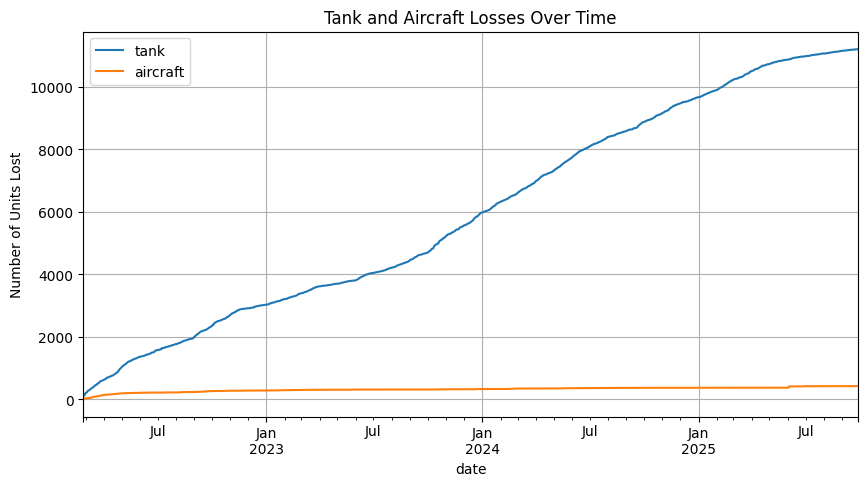

In [8]:
import matplotlib.pyplot as plt

# Plot tank and aircraft losses over time
df[['tank', 'aircraft']].plot(figsize=(10,5), title='Tank and Aircraft Losses Over Time')
plt.ylabel("Number of Units Lost")
plt.grid(True)
plt.show()

In [9]:
from sklearn.model_selection import train_test_split

# Drop columns not useful for ML
df_ml = df.drop(['day', 'greatest losses direction'], axis=1)

In [10]:
# Features = all except 'tank', Target = 'tank'
X = df_ml.drop('tank', axis=1)
y = df_ml['tank']

In [11]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [12]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Train model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [13]:
# Predict
y_pred = model.predict(X_test)

# Evaluate
print("R2 Score:", r2_score(y_test, y_pred))
print("RMSE:", mean_squared_error(y_test, y_pred, squared=False))

R2 Score: 0.9999966830609305
RMSE: 6.134672079330131
